<a href="https://colab.research.google.com/github/TartFroYo/ML-Exercises/blob/main/Wrangling_the_Billboard_Top_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wrangling the Billboard Top
Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

performer: who performed the song \
song: the title of the song \
year: year (1958 to 2021) \
week: chart week of that year (1, 2, etc) \
week_position: what position that song occupied that week on the Billboard top 100 chart. \

Use your skills in data wrangling and plotting to answer the following three questions.

###Set-up

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
billboard_origin = pd.read_csv('/content/drive/MyDrive/billboard.csv')
rel_cols = ['performer', 'song', 'week_position', 'week', 'year']
billboard_origin = billboard_origin[rel_cols]

##Part A
Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [4]:
# year >= 1958
# group by performer and song at some pt
# count weeks, desc ord by count
# keep performer, song, and count on chart
# describe table

billboard = billboard_origin
mask = billboard['year'] >= 1958
billboard = billboard[mask].groupby(['performer', 'song']).count().sort_values(by='week', ascending=False).drop(columns=['week_position', 'year']).head(10)
billboard = billboard.rename(columns={'week': 'count'})
display(billboard.head(10))

,,count
performer,song,
Imagine Dragons,Radioactive,87
AWOLNATION,Sail,79
The Weeknd,Blinding Lights,76
Jason Mraz,I'm Yours,76
LeAnn Rimes,How Do I Live,69
OneRepublic,Counting Stars,68
LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
Jewel,Foolish Games/You Were Meant For Me,65
Adele,Rolling In The Deep,65


I found the number 1 most popular song since 1958 to be Radioactive by Imagine Dragons. It spent a total of 87 weeks on the Billboard Top 100 given our dataset.The 10th most popular song is Before He Cheats by Carrie Underwood with 64 weeks on the Billboards Top 100. The range of the Billboard Top 10 songs since 1958 is 23 weeks.

##Part B
Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

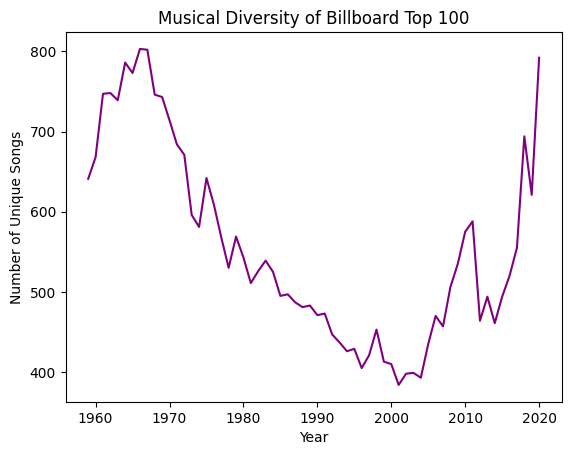

In [14]:
# times series plot
# x = year, y = number of unique songs in BT100 in given year
# no longer considering performer
# filter out year = 1958, 2021
# describe and comment trends

# first get a table counting song appears in BT100
# count num of unique songs from table by year

mask = (billboard_origin['year'] != 1958) & (billboard_origin['year'] != 2021)
bb_plot = billboard_origin[mask].groupby('year')['song'].nunique().drop(columns=['performer', 'week_position', 'week']).reset_index(name='u_songs')
bb_plot = bb_plot.set_index('year')

plt.plot(bb_plot, color='purple')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.title('Musical Diversity of Billboard Top 100')
plt.show()

Leading up to 1965, there is an increase in unique songs. Around 1965, we can see that there is a peak in the number of unique songs (800) in the Billboad Top 100. Afterwards, there is an overall decreasing trend in the number of unique songs, with the lowest number being 400 in the 2000s. Then, we see an increase in the number of unique songs from 2005 to 2010. After 2010, there is a short but steep decline, followed by a sharp increase in the number of unique songs that extends until our latest full year, 2020, reading to about the same height at in 1965.

##Part C
Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

Notes:

You might find this easier to accomplish in two distinct sets of data wrangling steps.
Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together. If you find that your plot isn't readable with vertical bars, you can add a coord_flip() layer to your plot to make the bars (and labels) run horizontally instead.
By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you'd like to order them according to some other variable, you can use the fct_reorder function, described in this blog post. This is optional.

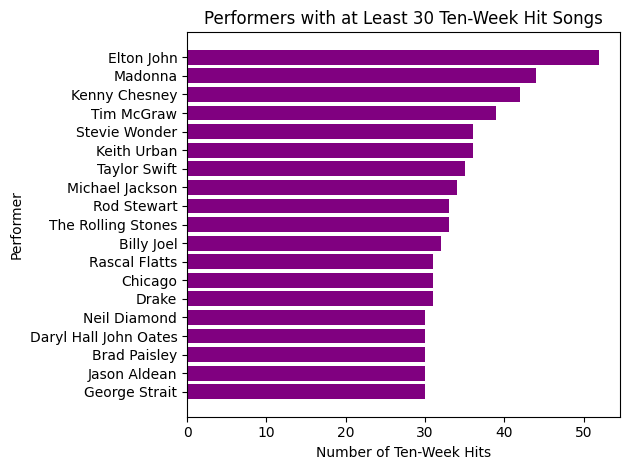

In [35]:
# find all 10 week hits
# find performers with >=30 10 week hits
# x = performer, y = num of 10 week hit songs
# plot tight and coordflip
# show in desc order
# decribe plot
import matplotlib.pyplot as plt

tenwh = billboard_origin.groupby(['performer', 'song']).size().reset_index(name='week_count')
mask = tenwh['week_count'] >= 10
perf_nhits = tenwh[mask].groupby('performer').size().reset_index(name='n_10wk_hits').sort_values(by='n_10wk_hits', ascending=True)
mask = perf_nhits['n_10wk_hits'] >= 30
perf_30hits = perf_nhits[mask]

plt.barh(perf_30hits['performer'], perf_30hits['n_10wk_hits'], color='purple')
plt.xlabel('Number of Ten-Week Hits')
plt.ylabel('Performer')
plt.title('Performers with at Least 30 Ten-Week Hit Songs')
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The performer with the most ten-week hit songs is Elton John with more than 50 song, making the range greater than 20. Madonna has the second most ten-week hit songs, with more than 40. Taylor Swift has marginally more ten-week hits than Michael Jackson. Neil Diamond, Daryl Hall John Oates, Brad Paisley, Jason Aldean, and George Strait have the same amount of ten-week hits (30).